In [7]:
%matplotlib inline
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [8]:
all_train = pd.read_csv('train.csv')

In [9]:
relevant_features_x = all_train[[
    'MSSubClass',
    'MSZoning',
    'LotArea',
    'Utilities',
    'Neighborhood',
    'BldgType',
    'HouseStyle',
    'OverallQual',
    'OverallCond',
    'SalePrice']]

In [26]:
fx = relevant_features_x[[
    'LotArea',
]]
fy = relevant_features_x[['SalePrice']]

q1 = fx.quantile(0.25)[0]
q3 = fx.quantile(0.75)[0]
iqr = q3 - q1
lot_area_bottom_outliers = q1 - 1.5 * iqr
lot_area_top_outliers = q3 + 1.5 * iqr
indices_to_keep = fx[((fx['LotArea'] > lot_area_bottom_outliers) & (fx['LotArea'] < lot_area_top_outliers))].index
fx = fx[fx.index.isin(indices_to_keep)]
fy = fy[fy.index.isin(indices_to_keep)]

x = fx.values
m,n = x.shape
y = fy.values
# x = X.T / 10000
# y = Y.T / 10000

In [27]:
model = LinearRegression().fit(x,y)
print(model.coef_)
print(model.intercept_)

[[10.20560011]]
[83504.48769064]


In [28]:
yhat = model.predict(x)
print((np.sum((y-yhat) ** 2)) / m)

4676876870.781457


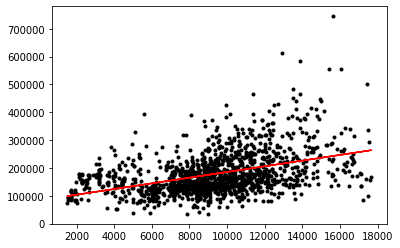

In [29]:
# plt.plot(a, b, 'o', color='black');
x1 = x.T[0]
y1 = y.T[0]

# Plot the best fit line over the actual values
slope = model.coef_[0,0]
b = model.intercept_[0]
plt.plot(x1,y1,'.', color='black')
plt.plot(x1, slope*x1 + b, linestyle='-', color='red')

plt.show()